In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [13]:
# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='edited lumo')
df = df.fillna(value=0)
X = df[list(df.columns)[42:56]]
y = df.iloc[:, -1:]
X.head()

,h1-ito,h2-h1,h3-h2,h4-h3,h5-h4,h6-h5,wf-h6,ito-L1,l1-l2,l2-l3,l3-l4,l4-l5,l5-l6,l6-wf
0,0.5,0.6,0.1,-0.56,1.46,-0.60,-2.70,1.4,1.3,-0.40,1.31,-1.41,-0.3,-0.70
1,4.8,-3.7,0.0,-0.24,0.00,1.12,-2.38,-1.0,3.7,-0.02,0.00,-0.71,0.0,-1.57
2,0.6,0.3,0.0,0.30,0.00,0.78,-3.18,2.4,0.3,-0.40,0.00,-0.33,0.0,-0.77
3,0.5,0.0,0.0,0.51,0.00,0.00,-1.51,1.4,0.6,0.00,0.00,-1.50,0.0,0.00
4,0.5,0.6,0.0,-0.45,0.00,0.85,-2.70,1.4,0.6,0.68,0.00,-0.78,0.0,-0.70


In [14]:
# preprocess the data and split the data for training and testing
# assign random state for reproducibility
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2793)

# take a look at the data after scaling
X[0:2]

array([[-0.49841369,  0.47940942,  0.02881177, -0.43031292,  2.94540298,
        -2.00191673,  0.20983406,  0.04888505,  0.18893604, -0.62080419,
         4.31479298, -1.83140356, -2.09162921,  0.24639639],
       [ 1.7311911 , -1.64693754, -0.11827988, -0.09361231, -0.49001104,
         1.06962812,  0.86181095, -1.72376921,  1.67288715,  0.07897692,
        -0.09757419, -0.5932048 ,  0.44025141, -1.61848177]])

In [15]:
# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.33517608479


In [16]:
# Check the cross validation score for the whole model

scores = cross_val_score(regressor, X, y, cv=5)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [-0.48224168 -1.04820449  0.28211483  0.51455076 -0.57554236]
mean score:  -0.261864587667


regression coefficient =
 [[ 32.13659933  30.62056564   7.35623634  12.03578043  -3.18525621
    0.62174446 -15.01323493 -29.15230334 -37.69211645 -18.6442378
  -10.93362181 -21.46374221 -13.8789917   -9.406472  ]]
regression intercept =  [ 24.95062407]


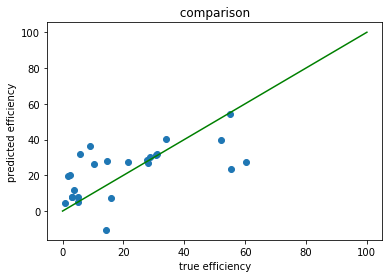

In [17]:
# see the coefficient of regression
coefficients = regressor.coef_
intercept = regressor.intercept_
print('regression coefficient =\n', coefficients)
print('regression intercept = ', intercept)# take a look at our model prediction. the best model will be very close to the line in the middle
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [18]:
# print predicted value and actual value to see how far off the prediction
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: [ 4.75936959],  Actual: [0.9]
Predicted: [ 28.67061138],  Actual: [27.7]
Predicted: [ 4.97637524],  Actual: [5.09]
Predicted: [ 31.91934418],  Actual: [5.6]
Predicted: [ 36.49192924],  Actual: [9.0]
Predicted: [ 7.93928683],  Actual: [4.92]
Predicted: [ 20.30146892],  Actual: [2.36]
Predicted: [ 26.42874823],  Actual: [10.2]
Predicted: [-10.5295515],  Actual: [14.3]
Predicted: [ 54.30241147],  Actual: [55.0]
Predicted: [ 19.61906765],  Actual: [1.8]
Predicted: [ 31.36136056],  Actual: [30.6]
Predicted: [ 11.65618024],  Actual: [3.78]
Predicted: [ 31.91934418],  Actual: [30.9]
Predicted: [ 40.01050326],  Actual: [52.1]
Predicted: [ 7.9538693],  Actual: [3.12]
Predicted: [ 27.91764599],  Actual: [14.7]
Predicted: [ 7.9538693],  Actual: [3.25]
Predicted: [ 27.65996003],  Actual: [21.4]
Predicted: [ 30.17754279],  Actual: [28.6]
Predicted: [ 40.02837765],  Actual: [34.0]
Predicted: [ 7.33230873],  Actual: [16.01]
Predicted: [ 26.7414057],  Actual: [28.24]
Predicted: [ 27.3431654